# 5.1 - SENTIMENT ANALYSIS - *Louvain*
 
Per eseguire l'analisi dei tweet scritti dagli utenti nelle comunità identificate con l'algoritmo **Louvain** sul processo di Johnny Depp e Amber Heard verrà utilizzato il modello **VADER ( Valence Aware Dictionary for Sentiment Reasoning)**, sensibile sia alla polarità (positivo/negativo) che all'intensità dell'emozione.
 
Per ciascuna comunità verrà:
1. assegnato un punteggio (compound) con la funzione *sentiment.polarity_scores* del modello Vader
2. impostate delle soglie per assegnare al tweet la classe NEUTRALE, POSITIVO E NEGATIVO in base al punteggio assegnato


I risultati della sentiment analysis verranno rappresentati il risultato utilizzando:
- pie chart e barchart (percentuali di tweet positivi, neutrali e negativi
- wordcloud (parole dei tweet classificati come neutri, positivi e negativi)

In [13]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords 

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('stopwords')
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# COMUNITÀ 0

In [15]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df = pd.read_csv('../data_collection/data/df_coms_lou_0.csv')
del df['Unnamed: 0']

#### 1. assegno dei punteggi ai tweet con la funzione *sentiment.polarity_scores*

In [16]:
df['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df['tweet'].astype(str)]
df['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df['tweet'].astype(str)]
df['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df['tweet'].astype(str)]
df['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df['tweet'].astype(str)]

In [17]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos
0,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks💜,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,"['live', 'tonight', 'pm', 'uk', 'pm', 'est', '...",1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000
1,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,"['live', 'tonight', 'pm', 'uk', 'pm', 'est', '...",1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000
2,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,"['live', 'tonight', 'pm', 'uk', 'pm', 'est', '...",1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000
3,2022-04-15,1150518666771013633,keeleytalks,KeeleyTalks💜,johnny depp v amber heard trial day recapfairf...,[],0,3,9,justiceforjohnnydepp johnnydepp deppvsheard,...,"['johnny', 'depp', 'v', 'amber', 'heard', 'tri...",1,9,57,5.444444,johnny,0.0000,0.000,1.000,0.000
4,2022-04-18,529559002,docbunny2020,"Bernice Sykes, PhD (Doc Bunny)",due,[],0,0,0,deppvsheard juror excused jury healthreasons ...,...,['due'],1,1,3,3.000000,NaN,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28527,2022-06-11,15571195,vipvirtualsols,✨Alexandra✨,petition remove ambassador woman right g u n g 💩,[],1,5,9,amberheard aclu amberheardlsanabuser amberhea...,...,"['petition', 'remove', 'ambassador', 'woman', ...",1,9,48,3.900000,NaN,0.0000,0.000,1.000,0.000
28528,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,breaking next role confirmed 💩🤡,[],0,0,7,amberheard aquaman aquamanandthelostkingdom a...,...,"['breaking', 'next', 'role', 'confirmed', '💩🤡']",1,5,31,5.400000,NaN,0.0000,0.000,1.000,0.000
28529,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,yes admitted blackmail setup hoax still believ...,[],0,2,11,amberheardlsanabuser amberheardlsaliar amberh...,...,"['yes', 'admitted', 'blackmail', 'setup', 'hoa...",1,12,79,5.666667,NaN,0.2500,0.138,0.592,0.270
28530,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,thickened plot 💩💩💩continues 🤔,[],0,1,2,amberheardlsanabuser amberheardlsaliar amberh...,...,"['thickened', 'plot', '💩💩💩continues', '🤔']",1,4,29,6.500000,NaN,0.0000,0.000,1.000,0.000


In [18]:
#imposto le soglie
df['sentimenti']=''
df.loc[df.compound > 0,'sentimenti']='POSITIVO'
df.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df.loc[df.compound < 0,'sentimenti']='NEGATIVO'

In [19]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks💜,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
1,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-04-15,1150518666771013633,keeleytalks,KeeleyTalks💜,johnny depp v amber heard trial day recapfairf...,[],0,3,9,justiceforjohnnydepp johnnydepp deppvsheard,...,1,9,57,5.444444,johnny,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-04-18,529559002,docbunny2020,"Bernice Sykes, PhD (Doc Bunny)",due,[],0,0,0,deppvsheard juror excused jury healthreasons ...,...,1,1,3,3.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28527,2022-06-11,15571195,vipvirtualsols,✨Alexandra✨,petition remove ambassador woman right g u n g 💩,[],1,5,9,amberheard aclu amberheardlsanabuser amberhea...,...,1,9,48,3.900000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
28528,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,breaking next role confirmed 💩🤡,[],0,0,7,amberheard aquaman aquamanandthelostkingdom a...,...,1,5,31,5.400000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
28529,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,yes admitted blackmail setup hoax still believ...,[],0,2,11,amberheardlsanabuser amberheardlsaliar amberh...,...,1,12,79,5.666667,NaN,0.2500,0.138,0.592,0.270,POSITIVO
28530,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,thickened plot 💩💩💩continues 🤔,[],0,1,2,amberheardlsanabuser amberheardlsaliar amberh...,...,1,4,29,6.500000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE


In [20]:
df["sentimenti"].value_counts()

NEGATIVO    10373
POSITIVO     9723
NEUTRALE     8436
Name: sentimenti, dtype: int64

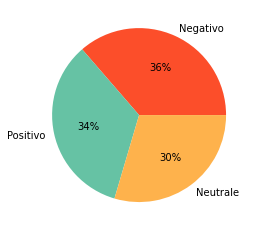

In [21]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c', 'red']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('img/sentiment_analysis/lou0_pieplt.png')
plt.show()

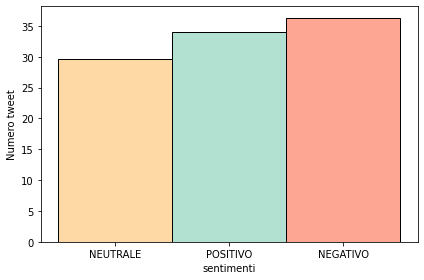

In [22]:
sns.set_palette("Set2")
colors = ['#feb24c',"#66c2a4",'#fc4e2a']
sns.histplot(x="sentimenti", data=df, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()


In [23]:
tok_pos = ' '.join(df[df['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['hm',
 'turned',
 'actually',
 'bisexual',
 'ok',
 'take',
 'back',
 'everything',
 'doubted',
 'rekietamedia',
 'living',
 'milanicosmetics',
 'confirming',
 'already',
 'knew',
 'thank',
 'milani',
 'cosmetic',
 '💕💕💕',
 'living',
 'milanicosmetics',
 'confirming',
 'already',
 'knew',
 'thank',
 'milani',
 'cosmetic',
 '💕💕💕',
 'always',
 'loved',
 'aburkhartlaw',
 'thought',
 'conclusion',
 'far',
 'best',
 'effective',
 'recap',
 'many',
 'reason',
 'damn',
 'important',
 '👏👏',
 'depp',
 'v',
 'heard',
 'legal',
 'analysis',
 'week',
 'johnny',
 'depp',
 'trial',
 'v',
 'amber',
 'hea',
 'via',
 'youtube',
 'please',
 'read',
 'thank',
 'taking',
 'place',
 'side',
 'team',
 'police',
 'need',
 'stop',
 'people',
 'continually',
 'active',
 'sort',
 'behaviour',
 'caught',
 'red',
 'handed',
 'team',
 'heard',
 'breaking',
 'court',
 'order',
 'comegeeksome',
 'always',
 'loved',
 'aburkhartlaw',
 'thought',
 'conclusion',
 'far',
 'best',
 'effective',
 'recap',
 'many',
 'reason'

In [24]:
freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber      2127
heard      1120
johnny     1111
depp        799
witness     735
love        620
trial       573
good        573
elaine      551
team        540
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

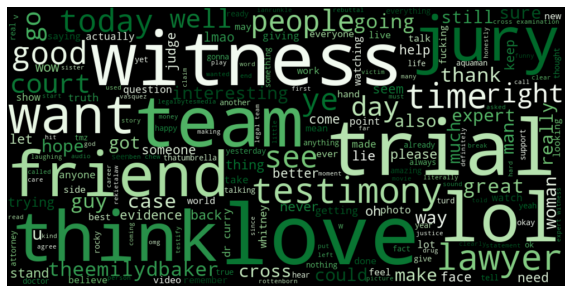

In [25]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou0_wc_pos.png')
plt.axis('off')

In [26]:
tok_neg= ' '.join(df[df['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['rekietamedia',
 'trying',
 'understand',
 'hell',
 'weird',
 'subtitle',
 'trying',
 'okay',
 'junky',
 'hour',
 'half',
 'crack',
 'sorry',
 'late',
 'got',
 'really',
 'sick',
 'yesterday',
 'struggled',
 'finish',
 'link',
 'aburkhartlaw',
 'debunked',
 'amber',
 'heard',
 'lie',
 'exposed',
 'johnny',
 'depp',
 'trial',
 'okay',
 'junky',
 'hour',
 'half',
 'crack',
 'sorry',
 'late',
 'got',
 'really',
 'sick',
 'yesterday',
 'struggled',
 'finish',
 'link',
 'aburkhartlaw',
 'moral',
 'conscience',
 'right',
 'condemning',
 'amber',
 'heard',
 'abuse',
 'johnny',
 'depp',
 'amber',
 'heard',
 'guilty',
 'abusing',
 'johnny',
 'depp',
 'change',
 'mind…',
 'nice',
 'people',
 'stopped',
 'saying',
 'bpd',
 'hpd',
 'form',
 'npd',
 'difference',
 'narcissistic',
 'actually',
 'npd',
 'cluster',
 'b',
 'enough',
 'stigma',
 'already',
 'stop',
 'shut',
 'survivor',
 'almost',
 'died',
 'side',
 'johnny',
 'depp',
 'amber',
 'heard',
 'almost',
 'killed',
 '🤬',
 'deposition',
 'x',

In [27]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber      2854
heard      1372
johnny     1222
depp        788
witness     686
elaine      681
dr          612
time        575
shit        522
team        498
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

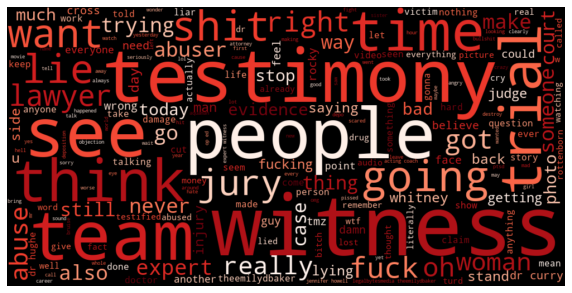

In [28]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou0_wc_neg.png')
plt.axis('off')

In [29]:
tok_neu= ' '.join(df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['live',
 'tonight',
 'pm',
 'uk',
 'pm',
 'est',
 'summary',
 'day',
 '👇',
 'live',
 'tonight',
 'pm',
 'uk',
 'pm',
 'est',
 'summary',
 'day',
 '👇',
 'live',
 'tonight',
 'pm',
 'uk',
 'pm',
 'est',
 'summary',
 'day',
 '👇',
 'johnny',
 'depp',
 'v',
 'amber',
 'heard',
 'trial',
 'day',
 'recapfairfax',
 'virginia',
 'due',
 'new',
 'video👇',
 'sayin…',
 '🤷\u200d♂️',
 'rekietamedia',
 'thatumbrella',
 'tickled',
 'much',
 'colonelkurtz',
 'wait',
 'til',
 'witness',
 'stand',
 'microscope',
 'trying',
 'keep',
 'lie',
 'together',
 'crumble',
 '💩🤮🤡⚰️🔚',
 'johnny',
 'depp',
 'need',
 'more…',
 'amber',
 'heard',
 'dna',
 'test',
 'came',
 'back',
 'stool',
 'le',
 '💩',
 'amber',
 'heard',
 'still',
 'career',
 '🚨',
 'breaking',
 'news',
 '🚨',
 'elon',
 'musk',
 'james',
 'franco',
 'testify',
 'depp',
 'heard',
 'trial',
 '🚨',
 'breaking',
 'news',
 '🚨',
 'elon',
 'musk',
 'james',
 'franco',
 'testify',
 'depp',
 'heard',
 'trial',
 'johnny',
 'depp',
 'trial',
 'outtake',
 'pricel

In [30]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             1270
heard              716
johnny             589
depp               477
witness            473
elaine             455
dr                 423
camille            358
time               342
theemilydbaker     312
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

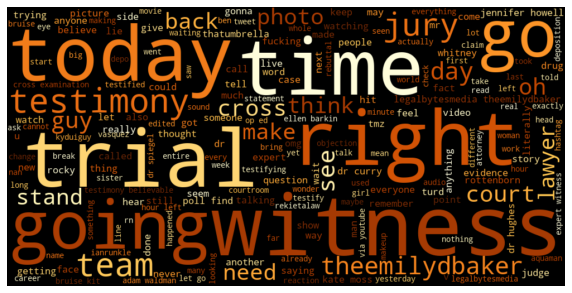

In [31]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords =stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou0_wc_neu.png')
plt.axis('off')

# COMUNITÀ 1

In [32]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df1 = pd.read_csv('../data_collection/data/df_coms_lou_1.csv')
del df1['Unnamed: 0']

In [33]:
df1

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,Unnamed: 0.1,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f
0,2022-04-23,2295851168,nymeria_rhaenys,Miko⁷ ⟭⟬💜⟬⟭ 🏴‍☠️,depp heard trial continues medium going cover ...,[],1,0,1,justiceforjohhnydepp deppvsheard,[],NaN,"['depp', 'heard', 'trial', 'continues', 'mediu...",1,20,149,6.142857,elaine
1,2022-04-23,2295851168,nymeria_rhaenys,Miko⁷ ⟭⟬💜⟬⟭ 🏴‍☠️,depp heard trial continues medium going cover ...,[],1,0,1,justiceforjohhnydepp deppvsheard,[],NaN,"['depp', 'heard', 'trial', 'continues', 'mediu...",1,20,149,6.142857,elaine
2,2022-05-01,2414913967,natesaver,Nate 🏴‍☠️,nessaaaevans,[],0,4,25,deppheardtrial justiceforjohnny justiceforjoh...,"[{'screen_name': 'NessaaaEvans', 'name': 'Nees...",NaN,['nessaaaevans'],1,1,12,12.000000,NaN
3,2022-05-01,2414913967,natesaver,Nate 🏴‍☠️,gellertdepp quickly amber heard heals,[],1,0,2,deppheardtrial justiceforjohnny justiceforjoh...,"[{'screen_name': 'GellertDepp', 'name': '🌟🏴\u2...",NaN,"['gellertdepp', 'quickly', 'amber', 'heard', '...",1,5,37,6.600000,amber
4,2022-05-01,2414913967,natesaver,Nate 🏴‍☠️,heard enough damage amber heard done abused ev...,[],3,11,44,deppheardtrial justiceforjohnny justiceforjoh...,[],NaN,"['heard', 'enough', 'damage', 'amber', 'heard'...",1,12,92,5.642857,amber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,2022-06-04,1491604879873351682,memehoe50,DexterPoin,fwiw nonsensensical verdict nincompoop cannot ...,[],1,0,3,deppvsheard deppheard thejury,[],2922.0,"['fwiw', 'nonsensensical', 'verdict', 'nincomp...",1,22,166,6.590909,NaN
6152,2022-06-04,1282171069,david_dauphine,david dauphine,piscesflowers alexn z angeitit court case uk d...,[],0,0,1,,"[{'screen_name': 'piscesflowers', 'name': 'lil...",2946.0,"['piscesflowers', 'alexn', 'z', 'angeitit', 'c...",1,17,125,5.300000,NaN
6153,2022-06-06,218487555,laurahuntori,Laura Hunt,thenamesq thatbrianfella lot sh went depp hear...,[],0,0,3,,"[{'screen_name': 'TheNamesQ', 'name': 'Jax 🏴\u...",3295.0,"['thenamesq', 'thatbrianfella', 'lot', 'sh', '...",1,14,99,6.142857,NaN
6154,2022-06-09,16700340,skyaswriter,Sky 🇺🇦NanaSky,redlianak kassandraseven dv survivor readily a...,[],0,0,7,,"[{'screen_name': 'redlianak', 'name': 'Liana K...",3388.0,"['redlianak', 'kassandraseven', 'dv', 'survivo...",1,25,189,5.333333,amber


In [34]:
df1['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df1['tweet'].astype(str)]
df1['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df1['tweet'].astype(str)]
df1['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df1['tweet'].astype(str)]
df1['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df1['tweet'].astype(str)]

In [35]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks💜,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
1,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-04-15,1150518666771013633,keeleytalks,KeeleyTalks💜,johnny depp v amber heard trial day recapfairf...,[],0,3,9,justiceforjohnnydepp johnnydepp deppvsheard,...,1,9,57,5.444444,johnny,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-04-18,529559002,docbunny2020,"Bernice Sykes, PhD (Doc Bunny)",due,[],0,0,0,deppvsheard juror excused jury healthreasons ...,...,1,1,3,3.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28527,2022-06-11,15571195,vipvirtualsols,✨Alexandra✨,petition remove ambassador woman right g u n g 💩,[],1,5,9,amberheard aclu amberheardlsanabuser amberhea...,...,1,9,48,3.900000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
28528,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,breaking next role confirmed 💩🤡,[],0,0,7,amberheard aquaman aquamanandthelostkingdom a...,...,1,5,31,5.400000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
28529,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,yes admitted blackmail setup hoax still believ...,[],0,2,11,amberheardlsanabuser amberheardlsaliar amberh...,...,1,12,79,5.666667,NaN,0.2500,0.138,0.592,0.270,POSITIVO
28530,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,thickened plot 💩💩💩continues 🤔,[],0,1,2,amberheardlsanabuser amberheardlsaliar amberh...,...,1,4,29,6.500000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE


In [36]:
#imposto le soglie
df1['sentimenti']=''
df1.loc[df1.compound >= 0.001,'sentimenti']='POSITIVO'
df1.loc[df1.compound == 0,'sentimenti']='NEUTRALE'
df1.loc[df1.compound <= -0.001,'sentimenti']='NEGATIVO'

In [37]:
df1

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-23,2295851168,nymeria_rhaenys,Miko⁷ ⟭⟬💜⟬⟭ 🏴‍☠️,depp heard trial continues medium going cover ...,[],1,0,1,justiceforjohhnydepp deppvsheard,...,1,20,149,6.142857,elaine,-0.7096,0.284,0.661,0.054,NEGATIVO
1,2022-04-23,2295851168,nymeria_rhaenys,Miko⁷ ⟭⟬💜⟬⟭ 🏴‍☠️,depp heard trial continues medium going cover ...,[],1,0,1,justiceforjohhnydepp deppvsheard,...,1,20,149,6.142857,elaine,-0.7096,0.284,0.661,0.054,NEGATIVO
2,2022-05-01,2414913967,natesaver,Nate 🏴‍☠️,nessaaaevans,[],0,4,25,deppheardtrial justiceforjohnny justiceforjoh...,...,1,1,12,12.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-05-01,2414913967,natesaver,Nate 🏴‍☠️,gellertdepp quickly amber heard heals,[],1,0,2,deppheardtrial justiceforjohnny justiceforjoh...,...,1,5,37,6.600000,amber,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-05-01,2414913967,natesaver,Nate 🏴‍☠️,heard enough damage amber heard done abused ev...,[],3,11,44,deppheardtrial justiceforjohnny justiceforjoh...,...,1,12,92,5.642857,amber,-0.8689,0.471,0.529,0.000,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,2022-06-04,1491604879873351682,memehoe50,DexterPoin,fwiw nonsensensical verdict nincompoop cannot ...,[],1,0,3,deppvsheard deppheard thejury,...,1,22,166,6.590909,NaN,-0.0772,0.081,0.851,0.068,NEGATIVO
6152,2022-06-04,1282171069,david_dauphine,david dauphine,piscesflowers alexn z angeitit court case uk d...,[],0,0,1,,...,1,17,125,5.300000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
6153,2022-06-06,218487555,laurahuntori,Laura Hunt,thenamesq thatbrianfella lot sh went depp hear...,[],0,0,3,,...,1,14,99,6.142857,NaN,-0.4939,0.218,0.690,0.092,NEGATIVO
6154,2022-06-09,16700340,skyaswriter,Sky 🇺🇦NanaSky,redlianak kassandraseven dv survivor readily a...,[],0,0,7,,...,1,25,189,5.333333,amber,-0.9232,0.403,0.444,0.152,NEGATIVO


In [38]:
df1["sentimenti"].value_counts()

NEGATIVO    2702
POSITIVO    2123
NEUTRALE    1331
Name: sentimenti, dtype: int64

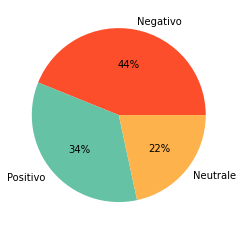

In [39]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df1["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('img/sentiment_analysis/lou1_pieplt.png')
plt.show()

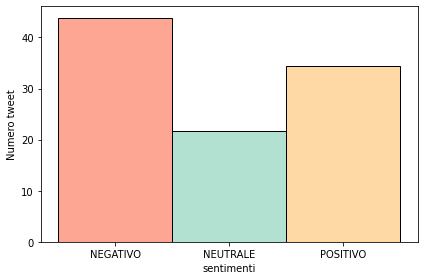

In [89]:
sns.set_palette("Set2")
colors = ['#fc4e2a', "#66c2a4", '#feb24c']
#labels = ['negativo', 'positivo', 'neutrale']
sns.histplot(x="sentimenti", data=df1, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()

plt.savefig('img/sentiment_analysis/lou1_barplt.png')
plt.show()

In [41]:
tok_pos = ' '.join(df1[df1['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['love',
 'see',
 'hashtags',
 'today',
 'please',
 'jury',
 'right',
 'thing',
 'johnny',
 'depp',
 'never',
 'lying',
 'bitch',
 'face',
 'never',
 'jdeppfxnn',
 'never',
 'emotionally',
 'invested',
 'celebrity',
 'court',
 'trial',
 'well',
 'actually',
 'trial',
 'ever',
 'followed',
 'want',
 'win',
 'ladbible',
 'definitely',
 'look',
 'aftermath',
 'bender',
 'sunflxwervolsix',
 'survivor',
 'sa',
 'dv',
 'ambassador',
 'represent',
 'u',
 'jdeppfxnn',
 'never',
 'emotionally',
 'invested',
 'celebrity',
 'court',
 'trial',
 'well',
 'actually',
 'trial',
 'ever',
 'followed',
 'want',
 'win',
 'ladbible',
 'definitely',
 'look',
 'aftermath',
 'bender',
 'sunflxwervolsix',
 'survivor',
 'sa',
 'dv',
 'ambassador',
 'represent',
 'u',
 'bexybeatdown',
 'gellertdepp',
 'variety',
 'certain',
 'degree',
 'cluelessness',
 'nuboj',
 'russrusso',
 'world',
 'love',
 'depp',
 'lmao',
 'hey',
 'fail',
 'getting',
 'sober',
 'still',
 'friend',
 'right',
 'lol',
 'support',
 'realamber

In [42]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber      448
depp       300
johnny     282
heard      213
trial      139
witness    137
love       130
want       125
friend     122
see        120
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

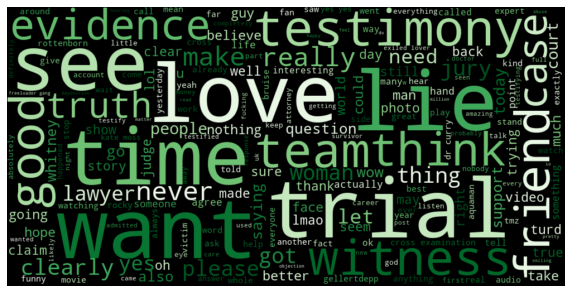

In [43]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou1_wc_pos.png')
plt.axis('off')

In [44]:
tok_neg= ' '.join(df1[df1['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()

In [45]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        630
heard        428
johnny       391
depp         370
witness      233
time         220
abuse        201
evidence     171
testimony    159
people       141
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

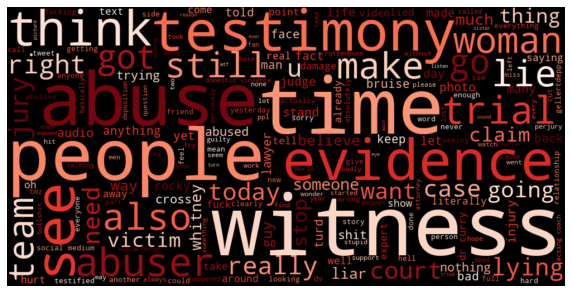

In [46]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds_r', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou1_wc_neg.png')
plt.axis('off')

In [47]:
tok_neu= ' '.join(df1[df1['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['nessaaaevans',
 'gellertdepp',
 'quickly',
 'amber',
 'heard',
 'heals',
 'clarehill',
 'im',
 'clarehill',
 'im',
 'clarehill',
 'im',
 'someone',
 'word',
 'deppers',
 'outside',
 'court',
 'instead',
 'booing',
 'yell',
 'couch',
 'couch',
 'couch',
 'anyway',
 'anyone',
 'send',
 'amber',
 'copy',
 'accurate',
 'least',
 'hollywood',
 'go',
 'near',
 'amber',
 'heard',
 'job',
 'selling',
 'avonworldwide',
 'way',
 'trying',
 'sell',
 'jury',
 'make',
 'bruise',
 'kit',
 'earlier',
 'cross',
 'examination',
 '👏',
 'think',
 'got',
 'impeached',
 'today',
 'simple',
 'money',
 'paid',
 'claim',
 'made',
 'donation',
 'synonym',
 'period',
 'nerve',
 'm',
 'turd',
 'talking',
 'tax',
 'break',
 'johnny',
 'donated',
 'donate',
 'etc',
 'donated',
 'nothing',
 'winonasrider',
 'johnny',
 'donated',
 'house',
 'mean',
 'pledged',
 'donate',
 'house',
 'fortune',
 'thing',
 'ya',
 'sayin',
 'give',
 'crown',
 'already',
 '👑',
 'literal',
 'bos',
 'queen',
 'lawyer\U0001faf6🏻🙌🏻👏🏻',
 'o

In [48]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        205
heard        133
witness       92
johnny        90
depp          89
elaine        64
time          63
😂             55
testimony     50
trial         50
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

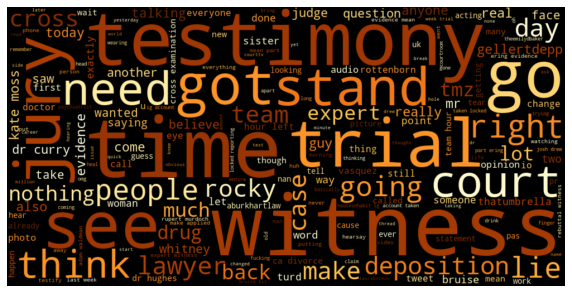

In [49]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou1_wc_neu.png')
plt.axis('off')

# COMUNITÀ 2

In [50]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df2 = pd.read_csv('../data_collection/data/df_coms_lou_2.csv')
del df2['Unnamed: 0']

In [51]:
df2

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,Unnamed: 0.1,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f
0,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,mr counciler make cant cover swelling,[],0,0,2,deppvsheard johnnydepp amberheard amberheardi...,[],NaN,"['mr', 'counciler', 'make', 'cant', 'cover', '...",1,6,37,5.333333,NaN
1,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,johnny depps sister defence also remember texted,[],0,0,13,johnnydepp amberheard deppvsheard amberheardi...,[],NaN,"['johnny', 'depps', 'sister', 'defence', 'also...",1,7,48,6.000000,johnny
2,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,really wish judge put stop amber staring johnn...,[],0,0,11,johnnydepp amberheard deppvsheard justiceforj...,[],NaN,"['really', 'wish', 'judge', 'put', 'stop', 'am...",1,12,72,5.083333,amber
3,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,judge overruled amber lawyer objection hour qu...,[],0,0,2,johnnydepp amberheardisanabuser deppvsheard j...,[],NaN,"['judge', 'overruled', 'amber', 'lawyer', 'obj...",1,14,110,5.937500,amber
4,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,mr counciler make cant cover swelling,[],0,0,2,deppvsheard johnnydepp amberheard amberheardi...,[],NaN,"['mr', 'counciler', 'make', 'cant', 'cover', '...",1,6,37,5.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,2022-06-12,2228032166,davidmkeynes,NotDavid,hey realamberheard pledge lawyer money hope go...,"[{'screen_name': 'realamberheard', 'name': 'am...",0,0,3,johnnydeppamberheardtrial amberheardlsanabuser,[],2641.0,"['hey', 'realamberheard', 'pledge', 'lawyer', ...",1,9,69,6.000000,NaN
9827,2022-06-12,2228032166,davidmkeynes,NotDavid,busy watching stupid acting realamberheard,"[{'screen_name': 'realamberheard', 'name': 'am...",0,0,1,sorryimlatei johnnydeppamberheardtrial,[],2645.0,"['busy', 'watching', 'stupid', 'acting', 'real...",1,5,42,7.600000,NaN
9828,2022-06-12,1223793419178270720,labaleriol,Gp9 Global Link News,realamberheard trying blackmail johnny depp,"[{'screen_name': 'realamberheard', 'name': 'am...",1,1,2,johnnydeppgotjustice justiceforjohnnydepp amb...,[],2648.0,"['realamberheard', 'trying', 'blackmail', 'joh...",1,5,43,7.800000,johnny
9829,2022-06-12,1406981015768293376,afggvv4,ThatMonkeGogeta🙂,notice anyone support realamberheard twitter c...,"[{'screen_name': 'realamberheard', 'name': 'am...",2,3,16,johnnydeppamberheardtrial amberheardisaliar a...,[],2650.0,"['notice', 'anyone', 'support', 'realamberhear...",1,14,131,6.764706,johnny


In [52]:
df2['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df2['tweet'].astype(str)]
df2['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df2['tweet'].astype(str)]
df2['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df2['tweet'].astype(str)]
df2['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df2['tweet'].astype(str)]

In [53]:
#imposto le soglie
df2['sentimenti']=''
df2.loc[df2.compound > 0,'sentimenti']='POSITIVO'
df2.loc[df2.compound == 0,'sentimenti']='NEUTRALE'
df2.loc[df2.compound < 0,'sentimenti']='NEGATIVO'

In [54]:
df2

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,mr counciler make cant cover swelling,[],0,0,2,deppvsheard johnnydepp amberheard amberheardi...,...,1,6,37,5.333333,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
1,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,johnny depps sister defence also remember texted,[],0,0,13,johnnydepp amberheard deppvsheard amberheardi...,...,1,7,48,6.000000,johnny,0.1027,0.000,0.811,0.189,POSITIVO
2,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,really wish judge put stop amber staring johnn...,[],0,0,11,johnnydepp amberheard deppvsheard justiceforj...,...,1,12,72,5.083333,amber,0.4201,0.136,0.556,0.308,POSITIVO
3,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,judge overruled amber lawyer objection hour qu...,[],0,0,2,johnnydepp amberheardisanabuser deppvsheard j...,...,1,14,110,5.937500,amber,0.5994,0.071,0.660,0.269,POSITIVO
4,2022-04-12,465944852,r3licx,R3lic 0 - 0🏆🏆🏆🏆🏆🏆,mr counciler make cant cover swelling,[],0,0,2,deppvsheard johnnydepp amberheard amberheardi...,...,1,6,37,5.333333,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,2022-06-12,2228032166,davidmkeynes,NotDavid,hey realamberheard pledge lawyer money hope go...,"[{'screen_name': 'realamberheard', 'name': 'am...",0,0,3,johnnydeppamberheardtrial amberheardlsanabuser,...,1,9,69,6.000000,NaN,0.5739,0.000,0.629,0.371,POSITIVO
9827,2022-06-12,2228032166,davidmkeynes,NotDavid,busy watching stupid acting realamberheard,"[{'screen_name': 'realamberheard', 'name': 'am...",0,0,1,sorryimlatei johnnydeppamberheardtrial,...,1,5,42,7.600000,NaN,-0.5267,0.459,0.541,0.000,NEGATIVO
9828,2022-06-12,1223793419178270720,labaleriol,Gp9 Global Link News,realamberheard trying blackmail johnny depp,"[{'screen_name': 'realamberheard', 'name': 'am...",1,1,2,johnnydeppgotjustice justiceforjohnnydepp amb...,...,1,5,43,7.800000,johnny,0.0000,0.000,1.000,0.000,NEUTRALE
9829,2022-06-12,1406981015768293376,afggvv4,ThatMonkeGogeta🙂,notice anyone support realamberheard twitter c...,"[{'screen_name': 'realamberheard', 'name': 'am...",2,3,16,johnnydeppamberheardtrial amberheardisaliar a...,...,1,14,131,6.764706,johnny,0.4019,0.000,0.856,0.144,POSITIVO


In [55]:
df2["sentimenti"].value_counts()

NEGATIVO    3806
POSITIVO    3337
NEUTRALE    2688
Name: sentimenti, dtype: int64

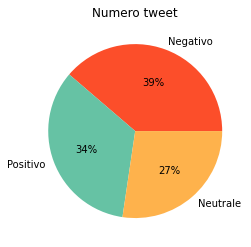

In [56]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df2["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')

plt.title("Numero tweet")
plt.savefig('img/sentiment_analysis/lou2_pieplt.png')
plt.show()

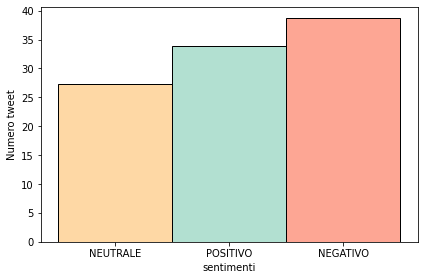

In [88]:
sns.set_palette("Set2")
colors = ['#feb24c', "#66c2a4",'#fc4e2a']
#labels = ['negativo', 'positivo', 'neutrale']
sns.histplot(x="sentimenti", data=df2, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('img/sentiment_analysis/lou2_barplt.png')
plt.show()

In [58]:
tok_pos = ' '.join(df2[df2['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['johnny',
 'depps',
 'sister',
 'defence',
 'also',
 'remember',
 'texted',
 'really',
 'wish',
 'judge',
 'put',
 'stop',
 'amber',
 'staring',
 'johnny',
 'every',
 'chance',
 'get',
 'allowed',
 'judge',
 'overruled',
 'amber',
 'lawyer',
 'objection',
 'hour',
 'questioning',
 'amber',
 'team',
 'objecting',
 'left',
 'right',
 'judge',
 'giving',
 'inch',
 'good',
 'johnny',
 'depps',
 'sister',
 'defence',
 'also',
 'remember',
 'texted',
 'really',
 'wish',
 'judge',
 'put',
 'stop',
 'amber',
 'staring',
 'johnny',
 'every',
 'chance',
 'get',
 'allowed',
 'judge',
 'overruled',
 'amber',
 'lawyer',
 'objection',
 'hour',
 'questioning',
 'amber',
 'team',
 'objecting',
 'left',
 'right',
 'judge',
 'giving',
 'inch',
 'good',
 'johnny',
 'depps',
 'sister',
 'defence',
 'also',
 'remember',
 'texted',
 'really',
 'wish',
 'judge',
 'put',
 'stop',
 'amber',
 'staring',
 'johnny',
 'every',
 'chance',
 'get',
 'allowed',
 'judge',
 'overruled',
 'amber',
 'lawyer',
 'objection

In [59]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             758
johnny            491
heard             350
depp              257
time              201
friend            195
love              191
elaine            182
witness           173
realamberheard    173
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

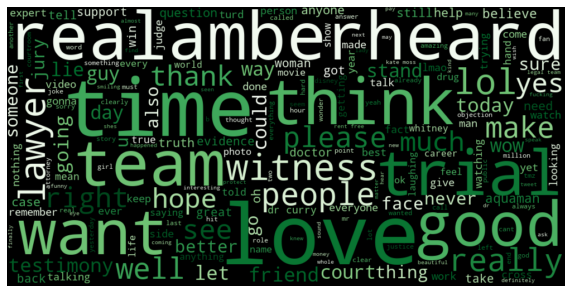

In [60]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df2
words = ' '.join([word for word in df2[df2['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou2_wc_pos.png')
plt.axis('off')

In [61]:
tok_neg= ' '.join(df2[df2['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['amber',
 'hears',
 'team',
 'lost',
 'email',
 'objection',
 'allowed',
 'case',
 'drug',
 'mean',
 'abuse',
 'side',
 'note',
 'last',
 'witness',
 'tho',
 'excused',
 'jury',
 'told',
 'strike',
 'testimony',
 'jury',
 'already',
 'heard',
 'heard',
 'make',
 'show',
 'court',
 'black',
 'suit',
 'dressing',
 'con',
 'woman',
 'usually',
 'attorney',
 'counsel',
 'soften',
 'appearance',
 'facing',
 'allegation',
 'yet',
 'show',
 'looking',
 'harsh',
 'johnny',
 'depps',
 'witness',
 'arnica',
 'cream',
 'white',
 'lotion',
 'applied',
 'clear',
 'skin',
 'saying',
 'bruise',
 'still',
 'visible',
 'essentially',
 'destroying',
 'amber',
 'defense',
 'johnny',
 'depp',
 'case',
 'amber',
 'heard',
 'account',
 'amber',
 'abuse',
 'happened',
 'johnny',
 'video',
 'prove',
 'false',
 'infact',
 'johnny',
 'prove',
 'fact',
 'win',
 'end',
 'day',
 'case',
 'jury',
 'going',
 'decide',
 'worse',
 'therapist',
 'saying',
 'abuse',
 'side',
 'pretty',
 'much',
 'destroys',
 'johnny',


In [62]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             900
johnny            453
heard             421
realamberheard    237
time              234
witness           226
depp              222
abuse             217
elaine            205
people            201
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

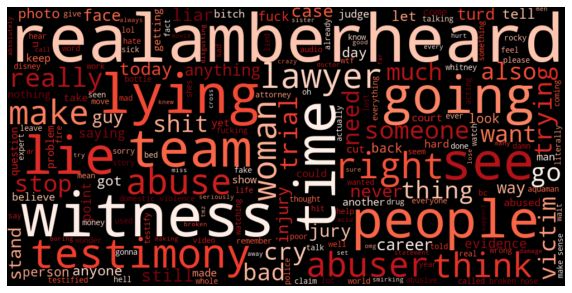

In [63]:
tweet_df = df2
stopw2 = stopwords.words('english') 
stopw2.extend([ 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

words = ' '.join([word for word in df2[df2['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords =stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou2_wc_neg.png')
plt.axis('off')

In [64]:
tok_neu= ' '.join(df2[df2['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['mr',
 'counciler',
 'make',
 'cant',
 'cover',
 'swelling',
 'mr',
 'counciler',
 'make',
 'cant',
 'cover',
 'swelling',
 'mr',
 'counciler',
 'make',
 'cant',
 'cover',
 'swelling',
 'judge',
 'ending',
 'day',
 'pick',
 'tomorrow',
 'day',
 'back',
 'break',
 'taking',
 'min',
 'break',
 'end',
 'day',
 'day',
 'trial',
 'resume',
 'monday',
 '\u200b',
 'hearing',
 'going',
 'hear',
 'reason',
 'need',
 'treatment',
 'dr',
 'kipper',
 'video',
 'testimony',
 'feb',
 'judge',
 'look',
 'right',
 'big',
 'discussion',
 'going',
 'judge',
 'desk',
 'lawyer',
 'side',
 'yet',
 'trial',
 'shown',
 'gentleman',
 'johnny',
 'depp',
 'scratch',
 'nose',
 'cheek',
 'forehead',
 'photo',
 'evidence',
 'johnny',
 'depp',
 'swollen',
 'left',
 'cheek',
 'redness',
 'really',
 'diggin',
 'johnny',
 'depps',
 'tie',
 'seems',
 'real',
 'black',
 'happened',
 'johnny',
 'depp',
 'nurse',
 'seems',
 'recall',
 'anything',
 'johnny',
 'depp',
 'scratch',
 'nose',
 'cheek',
 'forehead',
 'photo',
 

In [65]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             424
johnny            214
heard             198
elaine            147
depp              135
witness           132
time              114
go                102
realamberheard     96
today              94
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

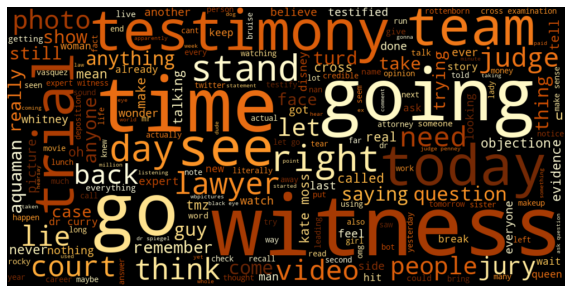

In [66]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine', 'realamberheard'])

tweet_df = df2
words = ' '.join([word for word in df2[df2['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou2_wc_neu.png')
plt.axis('off')

# COMUNITÀ 3

In [67]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df3 = pd.read_csv('../data_collection/data/df_coms_lou_3.csv')
del df3['Unnamed: 0']

In [68]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks💜,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
1,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-04-15,1150518666771013633,keeleytalks,KeeleyTalks💜,johnny depp v amber heard trial day recapfairf...,[],0,3,9,justiceforjohnnydepp johnnydepp deppvsheard,...,1,9,57,5.444444,johnny,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-04-18,529559002,docbunny2020,"Bernice Sykes, PhD (Doc Bunny)",due,[],0,0,0,deppvsheard juror excused jury healthreasons ...,...,1,1,3,3.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28527,2022-06-11,15571195,vipvirtualsols,✨Alexandra✨,petition remove ambassador woman right g u n g 💩,[],1,5,9,amberheard aclu amberheardlsanabuser amberhea...,...,1,9,48,3.900000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
28528,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,breaking next role confirmed 💩🤡,[],0,0,7,amberheard aquaman aquamanandthelostkingdom a...,...,1,5,31,5.400000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
28529,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,yes admitted blackmail setup hoax still believ...,[],0,2,11,amberheardlsanabuser amberheardlsaliar amberh...,...,1,12,79,5.666667,NaN,0.2500,0.138,0.592,0.270,POSITIVO
28530,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,thickened plot 💩💩💩continues 🤔,[],0,1,2,amberheardlsanabuser amberheardlsaliar amberh...,...,1,4,29,6.500000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE


In [69]:
df3['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df3['tweet'].astype(str)]
df3['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df3['tweet'].astype(str)]
df3['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df3['tweet'].astype(str)]
df3['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df3['tweet'].astype(str)]

In [70]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks💜,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
1,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-04-12,1150518666771013633,keeleytalks,KeeleyTalks🐝❤️,live tonight pm uk pm est summary day 👇,[],1,5,21,johnnydepp justiceforjohnnydepp deppvsheard j...,...,1,8,39,3.444444,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-04-15,1150518666771013633,keeleytalks,KeeleyTalks💜,johnny depp v amber heard trial day recapfairf...,[],0,3,9,justiceforjohnnydepp johnnydepp deppvsheard,...,1,9,57,5.444444,johnny,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-04-18,529559002,docbunny2020,"Bernice Sykes, PhD (Doc Bunny)",due,[],0,0,0,deppvsheard juror excused jury healthreasons ...,...,1,1,3,3.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28527,2022-06-11,15571195,vipvirtualsols,✨Alexandra✨,petition remove ambassador woman right g u n g 💩,[],1,5,9,amberheard aclu amberheardlsanabuser amberhea...,...,1,9,48,3.900000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
28528,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,breaking next role confirmed 💩🤡,[],0,0,7,amberheard aquaman aquamanandthelostkingdom a...,...,1,5,31,5.400000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
28529,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,yes admitted blackmail setup hoax still believ...,[],0,2,11,amberheardlsanabuser amberheardlsaliar amberh...,...,1,12,79,5.666667,NaN,0.2500,0.138,0.592,0.270,POSITIVO
28530,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,thickened plot 💩💩💩continues 🤔,[],0,1,2,amberheardlsanabuser amberheardlsaliar amberh...,...,1,4,29,6.500000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE


In [71]:
#imposto le soglie
df3['sentimenti']=''
df3.loc[df3.compound >= 0.001,'sentimenti']='POSITIVO'
df3.loc[df3.compound == 0,'sentimenti']='NEUTRALE'
df3.loc[df3.compound <= -0.001,'sentimenti']='NEGATIVO'

In [72]:
df3

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-13,1338906226403500032,dalia81213973,Dalia مصر 🇪🇬,cathyrusson lawcrimenetwork case johnny drug w...,[],1,0,11,deppvsheard,...,1,11,88,7.090909,johnny,-0.8225,0.518,0.482,0.000,NEGATIVO
1,2022-04-12,549318485,blancacobb,Blanca Cobb,careful saying word honestly derivation word h...,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,6,deppvsheard,...,1,15,125,6.875000,NaN,0.8979,0.000,0.460,0.540,POSITIVO
2,2022-04-12,549318485,blancacobb,Blanca Cobb,silent dislike flutter eye blink sister testim...,"[{'screen_name': 'courttv', 'name': 'court tv'...",1,2,15,amberheard johnnydepp bodylanguage deppvsheard,...,1,20,155,6.090909,amber,-0.1531,0.157,0.709,0.134,NEGATIVO
3,2022-04-13,1338906226403500032,dalia81213973,Dalia مصر 🇪🇬,cathyrusson lawcrimenetwork case johnny drug w...,[],1,0,11,deppvsheard,...,1,11,88,7.090909,johnny,-0.8225,0.518,0.482,0.000,NEGATIVO
4,2022-04-12,549318485,blancacobb,Blanca Cobb,careful saying word honestly derivation word h...,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,6,deppvsheard,...,1,15,125,6.875000,NaN,0.8979,0.000,0.460,0.540,POSITIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,POSITIVO
5575,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,POSITIVO
5576,2022-06-06,932310261737951233,tralalalumbum,"tralala, IMHO",people writing speculative harm done victim de...,[],3,6,55,,...,1,23,144,5.304348,NaN,-0.8316,0.362,0.537,0.101,NEGATIVO
5577,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,POSITIVO


In [73]:
df3["sentimenti"].value_counts()

POSITIVO    1923
NEGATIVO    1906
NEUTRALE    1750
Name: sentimenti, dtype: int64

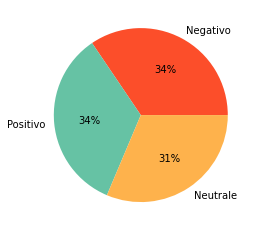

In [74]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df3["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('img/sentiment_analysis/lou3_pieplt.png')
plt.show()

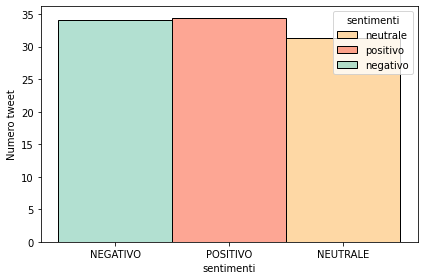

In [75]:
sns.set_palette("Set2")
colors = ["#66c2a4", '#fc4e2a', '#feb24c']
#labels = ['negativo', 'positivo', 'neutrale']
sns.histplot(x="sentimenti", data=df3, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('img/sentiment_analysis/lou3_barplt.png')
plt.show()

In [76]:
tok_pos = ' '.join(df3[df3['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['careful',
 'saying',
 'word',
 'honestly',
 'derivation',
 'word',
 'honest',
 'answering',
 'question',
 'come',
 'across',
 'truthful',
 'trying',
 'convince',
 'courttv',
 'courttvuk',
 'careful',
 'saying',
 'word',
 'honestly',
 'derivation',
 'word',
 'honest',
 'answering',
 'question',
 'come',
 'across',
 'truthful',
 'trying',
 'convince',
 'courttv',
 'courttvuk',
 'careful',
 'saying',
 'word',
 'honestly',
 'derivation',
 'word',
 'honest',
 'answering',
 'question',
 'come',
 'across',
 'truthful',
 'trying',
 'convince',
 'courttv',
 'courttvuk',
 'dr',
 'david',
 'kipper',
 'great',
 'witness',
 'corrected',
 'something',
 'ensure',
 'accuracy',
 'boost',
 'credibility',
 'something',
 'true',
 'corrected',
 'info',
 'remember',
 'liar',
 'opposite',
 'courttv',
 'courttvuk',
 'courttv',
 'tit',
 'tat',
 'friend',
 'testify',
 'friend',
 'stay',
 'court',
 'room',
 'least',
 'take',
 'case',
 'courttv',
 'tit',
 'tat',
 'friend',
 'testify',
 'friend',
 'stay',
 'cour

In [77]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

courttv           407
amber             405
heard             289
johnny            259
depp              216
witness           159
chanleycourttv    136
trial             114
good              107
jury              102
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

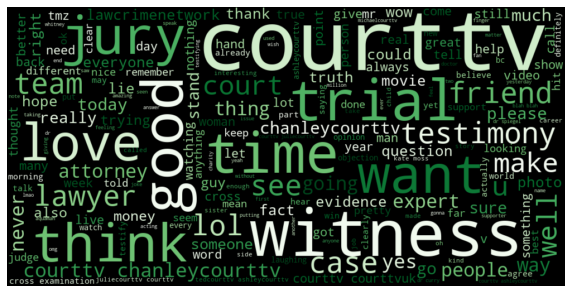

In [78]:

stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou3_wc_pos.png')
plt.axis('off')

In [79]:
tok_neg= ' '.join(df3[df3['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['cathyrusson',
 'lawcrimenetwork',
 'case',
 'johnny',
 'drug',
 'wine',
 'trouble',
 'fake',
 'injury',
 'inconsistent',
 'story',
 'silent',
 'dislike',
 'flutter',
 'eye',
 'blink',
 'sister',
 'testimony',
 'amber',
 'questioning',
 'dior',
 'wanted',
 'work',
 'johnny',
 'paraphrased',
 'response',
 'gt',
 'dior',
 'represents',
 'class',
 'want',
 'work',
 'courttv',
 'cathyrusson',
 'lawcrimenetwork',
 'case',
 'johnny',
 'drug',
 'wine',
 'trouble',
 'fake',
 'injury',
 'inconsistent',
 'story',
 'silent',
 'dislike',
 'flutter',
 'eye',
 'blink',
 'sister',
 'testimony',
 'amber',
 'questioning',
 'dior',
 'wanted',
 'work',
 'johnny',
 'paraphrased',
 'response',
 'gt',
 'dior',
 'represents',
 'class',
 'want',
 'work',
 'courttv',
 'cathyrusson',
 'lawcrimenetwork',
 'case',
 'johnny',
 'drug',
 'wine',
 'trouble',
 'fake',
 'injury',
 'inconsistent',
 'story',
 'silent',
 'dislike',
 'flutter',
 'eye',
 'blink',
 'sister',
 'testimony',
 'amber',
 'questioning',
 'dior',


In [80]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             498
heard             344
courttv           330
johnny            293
depp              263
time              121
witness           112
trial             107
chanleycourttv    106
lawyer            103
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

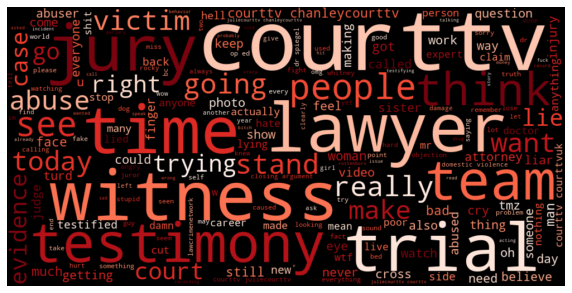

In [81]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou3_wc_neg.png')
plt.axis('off')

In [82]:

tok_neu= ' '.join(df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['live',
 'tonight',
 'pm',
 'uk',
 'pm',
 'est',
 'summary',
 'day',
 '👇',
 'live',
 'tonight',
 'pm',
 'uk',
 'pm',
 'est',
 'summary',
 'day',
 '👇',
 'live',
 'tonight',
 'pm',
 'uk',
 'pm',
 'est',
 'summary',
 'day',
 '👇',
 'johnny',
 'depp',
 'v',
 'amber',
 'heard',
 'trial',
 'day',
 'recapfairfax',
 'virginia',
 'due',
 'new',
 'video👇',
 'sayin…',
 '🤷\u200d♂️',
 'rekietamedia',
 'thatumbrella',
 'tickled',
 'much',
 'colonelkurtz',
 'wait',
 'til',
 'witness',
 'stand',
 'microscope',
 'trying',
 'keep',
 'lie',
 'together',
 'crumble',
 '💩🤮🤡⚰️🔚',
 'johnny',
 'depp',
 'need',
 'more…',
 'amber',
 'heard',
 'dna',
 'test',
 'came',
 'back',
 'stool',
 'le',
 '💩',
 'amber',
 'heard',
 'still',
 'career',
 '🚨',
 'breaking',
 'news',
 '🚨',
 'elon',
 'musk',
 'james',
 'franco',
 'testify',
 'depp',
 'heard',
 'trial',
 '🚨',
 'breaking',
 'news',
 '🚨',
 'elon',
 'musk',
 'james',
 'franco',
 'testify',
 'depp',
 'heard',
 'trial',
 'johnny',
 'depp',
 'trial',
 'outtake',
 'pricel

In [83]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             1270
heard              716
johnny             589
depp               477
witness            473
elaine             455
dr                 423
camille            358
time               342
theemilydbaker     312
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

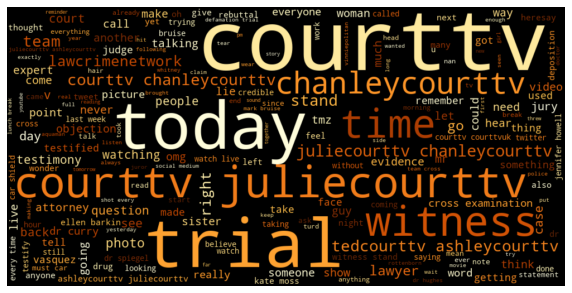

In [84]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/lou3_wc_neg.png')
plt.axis('off')

In [85]:
df.to_csv('../data_collection/data/df_sentiment_louvain.csv')